In [112]:
# reload(sys)
import pandas as pd
import numpy as np
import os
import random
from pdb import set_trace as bp
import matplotlib.pyplot as plt
from collections import defaultdict
import pickle
import sys 
from sklearn.utils import shuffle
from dataGenerator import DataGenerator
from keras.preprocessing.text import text_to_word_sequence
from utils import plotGraph,plotLengthHistogram,plotHist,labelPlot
from utils import createTiles, plotHistory
import seaborn as sns

pal = sns.color_palette()
%inline matplotlib

UsageError: Line magic function `%inline` not found.


In [19]:
trainData = pd.read_csv('data/train.csv')

In [3]:
trainData

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [9]:
text_to_word_sequence(trainData.iloc[0]['question1'])

['what',
 'is',
 'the',
 'step',
 'by',
 'step',
 'guide',
 'to',
 'invest',
 'in',
 'share',
 'market',
 'in',
 'india']

In [21]:
# text_to_word_sequence
def plotLengthHistogram(data):
    lenFreq = defaultdict(int)
    question1 = data['question1']
    try:
        for question in question1:
#             print question
#             print text_to_word_sequence(question)
            quest = text_to_word_sequence(question)
            lenFreq[len(quest)]+=1
        question2 = data['question2']
        for question in question2:
            quest = text_to_word_sequence(question)
            lenFreq[len(quest)]+=1
    except Exception as e:
        print (e)
    plotGraph( lenFreq.keys(), lenFreq.values(), 'length of question', 'No of questions', 'Frequency vs length' )
    return lenFreq

'float' object has no attribute 'lower'


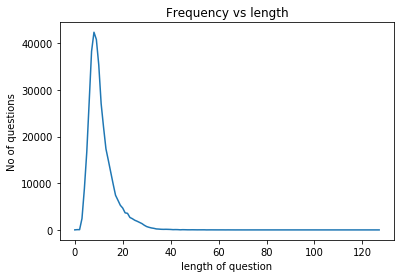

In [22]:
lenFreq = plotLengthHistogram(trainData)

In [30]:
trainData.shape

(404290, 6)

In [28]:
nData = sum(lenFreq.values())
cdfDict = defaultdict(float)
prevCount = 0
for key,value in lenFreq.iteritems():
    prevCount += value
    cdfDict[key] = prevCount    

In [29]:
for key,value in cdfDict.iteritems():
    print str(key) + " \t  -->  \t " + str(round(value/float(nData),4))

0 	  -->  	 0.0
1 	  -->  	 0.0002
2 	  -->  	 0.0004
3 	  -->  	 0.0071
4 	  -->  	 0.0314
5 	  -->  	 0.0773
6 	  -->  	 0.1527
7 	  -->  	 0.258
8 	  -->  	 0.3746
9 	  -->  	 0.4869
10 	  -->  	 0.5842
11 	  -->  	 0.6585
12 	  -->  	 0.7191
13 	  -->  	 0.7669
14 	  -->  	 0.8079
15 	  -->  	 0.8419
16 	  -->  	 0.869
17 	  -->  	 0.8894
18 	  -->  	 0.9069
19 	  -->  	 0.9215
20 	  -->  	 0.9344
21 	  -->  	 0.9444
22 	  -->  	 0.9542
23 	  -->  	 0.9616
24 	  -->  	 0.9682
25 	  -->  	 0.9739
26 	  -->  	 0.979
27 	  -->  	 0.9835
28 	  -->  	 0.9872
29 	  -->  	 0.99
30 	  -->  	 0.992
31 	  -->  	 0.9935
32 	  -->  	 0.9946
33 	  -->  	 0.9956
34 	  -->  	 0.9962
35 	  -->  	 0.9967
36 	  -->  	 0.997
37 	  -->  	 0.9974
38 	  -->  	 0.9977
39 	  -->  	 0.9981
40 	  -->  	 0.9983
41 	  -->  	 0.9985
42 	  -->  	 0.9987
43 	  -->  	 0.9989
44 	  -->  	 0.9989
45 	  -->  	 0.9991
46 	  -->  	 0.9992
47 	  -->  	 0.9993
48 	  -->  	 0.9993
49 	  -->  	 0.9994
50 	  -->  	 0.9995


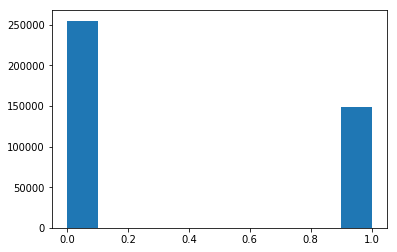

In [32]:
plotHist(trainData['is_duplicate'])

In [42]:
qids = list(trainData['qid1']) + list(trainData['qid2'] ) 

In [45]:
len(set(qids))

537933

In [98]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
from nltk.stem.porter import *
import string
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def preprocess(text):
    if type(text)==float:
        print text
    text = text.lower().translate(None, string.punctuation)
    return text

def tokenize(text):
    #print text
    text = unicode(text)
    #text = re.sub(r'\d+', '', text)
    #print text
    tokens = nltk.word_tokenize(text)
    
    stems = []
    for item in tokens:
       if item not in stop_words:
            #stems.append(item)
           stems.append(PorterStemmer().stem(item))
    return stems

In [105]:
set(tokenize(preprocess(trainData.iloc[3]['question1'])))

{u'lone', u'mental', u'solv'}

In [106]:
iouDict1 = defaultdict(int)
iouDict0 = defaultdict(int)
trainData.dropna(inplace=True)

for i in range(trainData.shape[0]):
    row = trainData.iloc[i]
    try:
        if row['is_duplicate']:
            #         print row['question1']
            q1 = set(tokenize(preprocess(row['question1'])))
            q2 = set(tokenize(preprocess(row['question2'])))
    #         q2 = set(text_to_word_sequence(row['question2']))
            iou = round(float(len(q1 & q2)/float(len( q1 | q2))),2)
            iouDict1[iou] += 1
        else:
            q1 = set(text_to_word_sequence(row['question1']))
            q2 = set(text_to_word_sequence(row['question2']))
            iou = round(float(len(q1 & q2)/float(len( q1 | q2))),2)
            iouDict0[iou] += 1
    except:
        pass

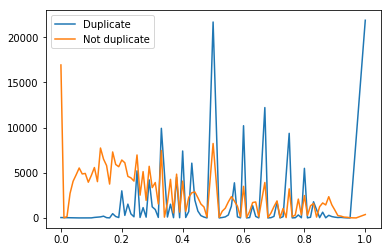

In [116]:
iouData1 = zip(iouDict1.keys(), iouDict1.values() )
iouData1Sorted = sorted(iouData1 , key = lambda x : x[0] )
iou1, freq1 = zip(*iouData1Sorted)

iouData0 = zip(iouDict0.keys(), iouDict0.values() )
iouData0Sorted = sorted(iouData0 , key = lambda x : x[0] )
iou0, freq0 = zip(*iouData0Sorted)

plt.plot(iou1, freq1 )
plt.plot(iou0, freq0 )
plt.legend(['Duplicate', 'Not duplicate'])
plt.show()